## Lesson 9
# House Prediction Prices

In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
# Importing dataset

housing = fetch_california_housing()
print(housing)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]], shape=(20640, 8)), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset

In [6]:
# Using Pandas to make data better
df = pd.DataFrame(housing.data, columns= housing.feature_names)
df.head(20)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [7]:
# Define X and y

X = housing.data[:, 0].reshape(-1, 1) # Only 'MedInc' and MedInc means (median income)
y = housing.target # Median House Price


In [8]:
# Spliting the data for train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
# Scale 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

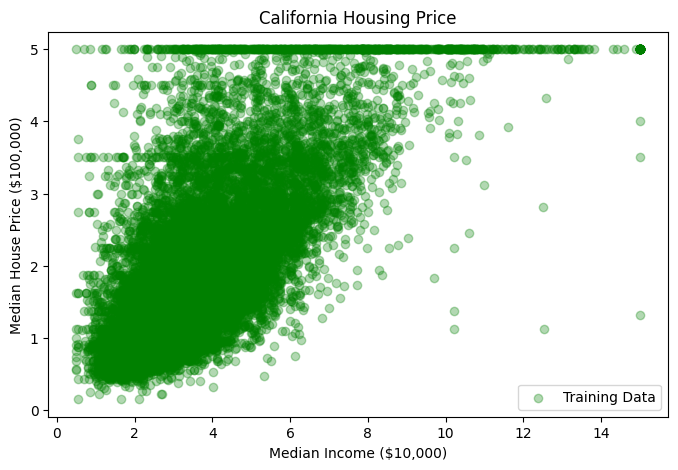

In [10]:
# Plot and Visualize the data

plt.figure(figsize=(8,5))
plt.scatter(X_train, y_train, alpha=0.3, color='green', label='Training Data')
plt.xlabel("Median Income ($10,000)")
plt.ylabel("Median House Price ($100,000)")
plt.title("California Housing Price")
plt.legend()
plt.show()

In [13]:
# Fit a simple line regression model

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [14]:
# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f"Linear Regression MSE: {mse_linear:.2f}")


Linear Regression MSE: 0.71


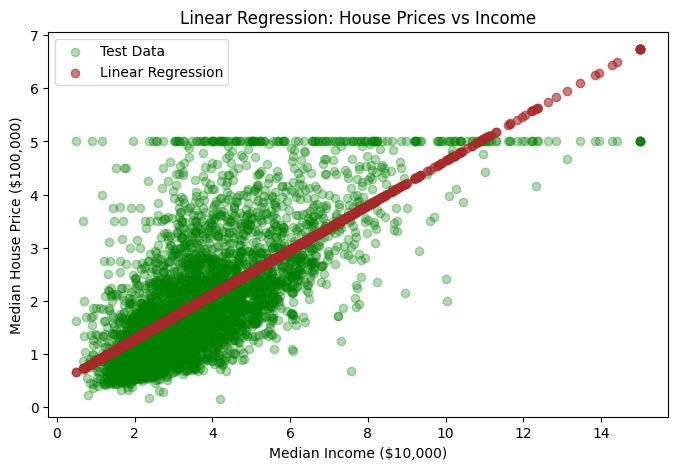

In [16]:
# Plot the linear regression 

plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.3, color='green', label='Test Data')
plt.scatter(X_test, y_pred_linear, alpha=0.6, color='brown', label='Linear Regression')
plt.xlabel("Median Income ($10,000)")
plt.ylabel("Median House Price ($100,000)")
plt.title("Linear Regression: House Prices vs Income")
plt.legend()
plt.show()

In [17]:
# Transform feature to include polynomial terms

poly = PolynomialFeatures(degree = 2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [18]:
# Train Polynomial Regression Model

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [20]:
mse_ploy = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Regression MSE: {mse_ploy:.2f}")

Polynomial Regression MSE: 0.70


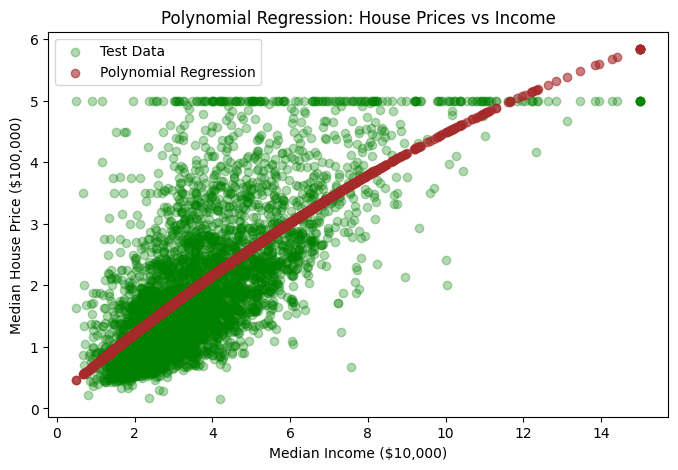

In [21]:
# Plot the polynomial regression


plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, alpha=0.3, color='green', label='Test Data')
plt.scatter(X_test, y_pred_poly, alpha=0.6, color='brown', label='Polynomial Regression')
plt.xlabel("Median Income ($10,000)")
plt.ylabel("Median House Price ($100,000)")
plt.title("Polynomial Regression: House Prices vs Income")
plt.legend()
plt.show()